<a href="https://colab.research.google.com/github/mpedraza98/DSPS_MPedraza/blob/main/HW8/higgsbosonSearch_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import json
import os
import pylab as pl
%pylab inline
from sklearn import tree
from sklearn.model_selection import train_test_split
from google.colab import drive
import json 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

Populating the interactive namespace from numpy and matplotlib


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data



- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [ ]:
pip install kaggle

In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
envs = json.load(open(".kaggle/kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [ ]:
#mkdir dsps

In [ ]:
cd dsps/

/content/drive/MyDrive/dsps


In [ ]:
#mkdir higgsboson

In [ ]:
cd higgsboson/

/content/drive/MyDrive/dsps/higgsboson


In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-21 16:54:23          16058  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9693  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4438  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3543  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!kaggle competitions download -c higgs-boson

HiggsBosonCompetition_AMSMetric_rev1.py: Skipping, found more recently modified local copy (use --force to force download)
random_submission.zip: Skipping, found more recently modified local copy (use --force to force download)
training.zip: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  test.csv  training.csv
random_submission.zip                    test.zip  training.zip


In [ ]:
higgsdata = pd.read_csv('training.csv')

In [ ]:
#Remove missing values
higgsdata = higgsdata[(higgsdata != -999.0)]
higgsdata.dropna(axis=0,inplace=True)

In [ ]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653,s
5,100005,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414,b
6,100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653,s
11,100011,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,239.804,1.061,1.364,0.769,35.976,-0.669,-0.342,38.188,-0.165,2.502,22.385,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640,0.307170,b
23,100023,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,440.859,0.652,1.042,0.207,98.565,0.190,-1.506,64.285,1.405,-0.952,17.960,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009,0.001503,s


In [ ]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000
mean,225035.224154,122.816184,35.270300,78.496815,111.430393,2.434232,378.176455,-0.881020,1.996525,27.356644,281.524727,1.480924,0.637307,0.463833,45.716667,-0.003367,0.001104,52.433431,-0.003671,0.041897,54.959294,0.006987,334.677667,2.303711,106.879969,-0.005791,-0.011564,57.915426,-0.012930,-0.004782,183.374631,0.445788
std,72243.940540,60.751559,30.750262,40.728784,76.318688,1.750700,400.784254,3.592624,0.774636,28.266913,130.245426,1.097985,0.924876,0.398422,29.681876,1.179442,1.818341,28.798872,1.197358,1.815463,42.690672,1.813892,139.867044,0.459863,68.165852,1.746442,1.809276,32.224318,2.044065,1.817247,108.312736,0.747552
min,100000.000000,9.878000,0.000000,7.330000,0.120000,0.000000,13.602000,-18.066000,0.228000,0.004000,110.601000,0.047000,-1.414000,0.000000,20.000000,-2.496000,-3.141000,26.001000,-2.487000,-3.142000,0.200000,-3.142000,34.323000,2.000000,30.196000,-4.497000,-3.142000,30.000000,-4.500000,-3.142000,60.223000,0.001502
25%,162349.750000,93.320250,11.320000,57.274250,57.827000,0.897000,113.463000,-2.729000,1.397000,4.218000,192.844250,0.762250,0.191000,0.005000,26.589250,-0.889000,-1.570000,33.280250,-0.908750,-1.518000,27.081000,-1.550000,239.168250,2.000000,60.844500,-1.339000,-1.574000,37.392250,-1.628750,-1.579000,109.472000,0.001503
50%,225288.000000,113.230000,26.964000,70.930000,94.714000,2.146500,232.370500,-0.284000,1.940000,22.542000,246.719500,1.206000,1.071000,0.469000,36.590500,-0.011000,-0.010000,43.450000,-0.009000,0.077000,44.292000,0.005000,305.170000,2.000000,87.369000,0.000000,-0.032000,48.105500,-0.014000,-0.008000,154.136500,0.064061
75%,287772.750000,133.455750,52.202750,88.372000,145.824750,3.741000,489.447750,0.921000,2.574000,39.067750,331.105000,1.854000,1.342000,0.883000,54.194250,0.879750,1.580000,61.482000,0.904000,1.609000,69.416250,1.573000,396.382500,3.000000,131.069000,1.330000,1.558000,66.946500,1.604000,1.573000,223.595250,0.744056
max,349994.000000,988.199000,594.287000,789.538000,1053.807000,8.503000,4974.979000,16.648000,5.579000,466.525000,1852.462000,19.773000,1.414000,1.000000,622.862000,2.497000,3.142000,461.896000,2.499000,3.141000,951.363000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.805035


In [ ]:
labels = higgsdata['Label']
weights = higgsdata['Weight']

Delete as well the EventId, this feature just assigns an index to the event, doesn't contain any physics in it

In [ ]:
higgsdata = higgsdata.drop(['EventId', 'Weight', 'Label'], axis=1)

In [ ]:
higgsdata.shape

(68114, 30)

In [ ]:
higgsdata.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
11,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,239.804,1.061,1.364,0.769,35.976,-0.669,-0.342,38.188,-0.165,2.502,22.385,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640
23,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,440.859,0.652,1.042,0.207,98.565,0.190,-1.506,64.285,1.405,-0.952,17.960,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009


- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [ ]:
# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
for i in rf.get_params().items():
  print(i)

Parameters currently in use:

('bootstrap', True)
('ccp_alpha', 0.0)
('class_weight', None)
('criterion', 'gini')
('max_depth', None)
('max_features', 'auto')
('max_leaf_nodes', None)
('max_samples', None)
('min_impurity_decrease', 0.0)
('min_samples_leaf', 1)
('min_samples_split', 2)
('min_weight_fraction_leaf', 0.0)
('n_estimators', 100)
('n_jobs', None)
('oob_score', False)
('random_state', 0)
('verbose', 0)
('warm_start', False)


In [ ]:
labels.unique()

array(['s', 'b'], dtype=object)

Max Depth = 4:

In [ ]:
rf = RandomForestClassifier(max_depth=4, random_state=345)

In [ ]:
gbt = GradientBoostingClassifier(max_depth=4, random_state=345)

In [ ]:
#rf0 = rf.fit(higgsdata.values, labels)

In [ ]:
#gbt0 = gbt.fit(higgsdata.values, labels)

In [ ]:
X_train, X_test, y_Train, y_test = train_test_split(higgsdata, labels, test_size=0.2)

In [ ]:
rf1 = rf.fit(X_train, y_Train)

In [ ]:
#Random forest scores for training and test sets (max_depth = 4)
rf1.score(X_train, y_Train), rf1.score(X_test, y_test)

(0.8173643353948359, 0.8125963444175291)

In [ ]:
#Gradient boosting classifier for training data
gbt1 = gbt.fit(X_train, y_Train)

In [ ]:
#Gradient boosting score training and test data (max_depth = 4)
gbt1.score(X_train, y_Train), gbt1.score(X_test, y_test)

(0.8552054467710264, 0.8477574689862732)

The above scores are for a max_depth = 4. For the random forest classifier, the train score was about perfect and the test score were both ~84%. For gradient boosting (which took significantly longer to run), the train score was about 1.5% higher than the test score. I'm not sure exactly why the train score was perfect for the RF method, but both of the test scores were relatively good given only a max_depth of 4.

Max Depth = 12:

In [ ]:
rf = RandomForestClassifier(max_depth=12, random_state=345)
gbt = GradientBoostingClassifier(max_depth=12, random_state=345)

In [ ]:
rf2 = rf.fit(X_train, y_Train)

In [ ]:
#Random forest scores for training and test sets (max_depth = 12)
rf1.score(X_train, y_Train), rf1.score(X_test, y_test)

(0.8173643353948359, 0.8125963444175291)

In [ ]:
gbt2 = gbt.fit(X_train, y_Train)

In [ ]:
#Gradient boosting score training and test data (max_depth = 12)
gbt2.score(X_train, y_Train), gbt2.score(X_test, y_test)

(0.9992842854783359, 0.8454819056008221)

With a max depth of 12, these tree methods have more steps to try to efficiently classify the data. For both methods, this did not increase the test score, potential showing signs of overfitting. In the gradient boosting method, the train score did improve about 15%.

- Produce a confusion matrix for each model and compare them


 



In [ ]:

# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = colorbar(im, cax=cax)
    

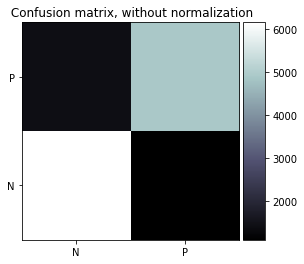

In [ ]:
plot_confusion_matrix(y_test,rf1.predict(X_test))

Confusion matrix for Random Forest Classifier

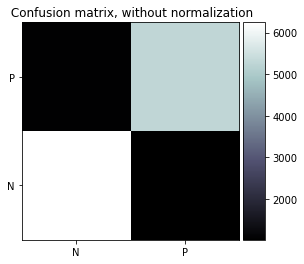

In [ ]:
plot_confusion_matrix(y_test,gbt1.predict(X_test))

Confusion matrix for Gradient Boosting

Both of the confusion matrices show nearly identical patterns. Values are under 1000 for false positives and false negatives, which is a good signal. For the true negatives, values are over 6000, and for true positives, there are over 5000. These are positive results for the accuracy of the model, consistent with the relatively high scores as well.


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [ ]:
traindata_weights, testdata_weights, train_weights, test_weights = train_test_split(higgsdata, weights, test_size=0.2)

In [ ]:
rfR = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=345)

In [ ]:
rfR1 = rfR.fit(traindata_weights, train_weights)

In [ ]:
rfR1.score(traindata_weights, train_weights), rfR1.score(testdata_weights, test_weights)

(0.34967171155433496, 0.3457944371459668)

Now, let's create the gradient boosting regressor

In [ ]:
gbR = GradientBoostingRegressor(n_estimators=100, max_depth=4, random_state=345)

In [ ]:
gbR1 = gbR.fit(traindata_weights, train_weights)

In [ ]:
gbR1.score(traindata_weights, train_weights), gbR1.score(testdata_weights, test_weights)

(0.5049934870064997, 0.4540743179211295)

The score results for RF and gradient boosting regressor on weights are not as good as the results for the labels. Although the scores are 10-15% higher for gradient boosting regressor, the values are still around or less than 50%. This shows that the models have an easier time predicting labels than weights - which somewhat makes sense because of the more complex division of weights versus only two labels.

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [ ]:
# Calculate the L1 and L2 metric for both methods
L1_rf = np.sum(np.abs(rfR1.predict(testdata_weights)-test_weights))
L1_gb = np.sum(np.abs(gbR1.predict(testdata_weights)-test_weights))

L2_rf = np.sum((rfR1.predict(testdata_weights)-test_weights)**2)
L2_gb = np.sum((gbR1.predict(testdata_weights)-test_weights)**2)

In [ ]:
print("The L1 metric is \n")
print("Random Forest: {:.2f}".format(L1_rf))
print("Gradient Booster: {:.2f} \n".format(L1_gb))
print("The L2 metric is \n")
print("Random Forest: {:.2f}".format(L2_rf))
print("Gradient Booster: {:.2f} \n".format(L2_gb))

The L1 metric is 

Random Forest: 5380.17
Gradient Booster: 4680.93 

The L2 metric is 

Random Forest: 5089.50
Gradient Booster: 4247.12 



- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

    You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

    Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



In [ ]:
importancesrf = rf1.feature_importances_
std = np.std([onetree.feature_importances_ for onetree in rf1.estimators_],
             axis=0)
indicesrf = np.argsort(importancesrf)[::-1]
best_features_index = np.zeros(4)
# Print the feature ranking
print("Feature ranking:")

for f in range(4):
  best_features_index[f] = indicesrf[f]
  print("%d. feature %d %s (%f)" % (f + 1, indicesrf[f], higgsdata.columns[indicesrf[f]], importancesrf[indicesrf[f]]))

Feature ranking:
1. feature 0 DER_mass_MMC (0.337654)
2. feature 2 DER_mass_vis (0.124252)
3. feature 4 DER_deltaeta_jet_jet (0.098346)
4. feature 6 DER_prodeta_jet_jet (0.097638)


These are the 4 most important features in our dataset. The documentation found [here](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf) tells us what is the meaning of these four features.



1.   DER_mass_MMC: Estimated mass of the Higgs Boson candidate. Therefore, it was expected to be the most important feature of the data.
2.   DER_mass_vis: Invariant mass of the two particles.
3.   DER_deltaeta_jet_jet:  The absolute value of the pseudorapidity separation between the two jets
4.   DER_lep_eta_centrality: The pseudorapidity η of the lepton


Using the guide in https://towardsdatascience.com/machine-learning-gridsearchcv-randomizedsearchcv-d36b89231b10 we build the RandomSearcher

In [ ]:
#We used the code provided in the skeleton notebook for this part of the homework

n_estimators = [10, 100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3, 10]
max_depth.append(None)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

In [ ]:
pprint(random_grid)

Pretty printing has been turned OFF


In [ ]:
random_grid

{'n_estimators': [10, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 10, None], 'bootstrap': [True, False]}

 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [ ]:
higgs_best = higgsdata.iloc[:, best_features_index]

In [ ]:
X_test_bhiggs, X_train_bhiggs, y_test_bhiggs, y_train_bhiggs = train_test_split(higgs_best, labels, test_size=0.2)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 24 different combinations
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=random_grid, n_iter=10, cv=3)

Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [ ]:
random_search.fit(X_test_bhiggs, y_test_bhiggs)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 100]})

In [ ]:
random_search.best_params_, random_search.best_score_

({'n_estimators': 100, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}, 0.8043713380139166)

In [ ]:
print("Tuned RF  Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_))

Tuned RF  Parameters: {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Best score is 0.8043713380139166


In [ ]:
df = pd.DataFrame(random_search.cv_results_)

In [ ]:
#df

In [ ]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.725828,0.012523,0.069364,0.001167,10,sqrt,10,True,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.802797,0.804283,0.800914,0.802665,0.001379,3
1,3.553736,0.010319,0.165165,0.003000,100,sqrt,3,False,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.783308,0.787106,0.786269,0.785561,0.001630,7
2,10.283362,0.020810,0.491445,0.002375,100,auto,None,True,"{'n_estimators': 100, 'max_features': 'auto', ...",0.793988,0.795364,0.791995,0.793782,0.001383,5
3,3.521509,0.015667,0.163024,0.000958,100,auto,3,False,"{'n_estimators': 100, 'max_features': 'auto', ...",0.784189,0.787216,0.786269,0.785891,0.001265,6
4,1.070976,0.002916,0.089862,0.002136,10,sqrt,None,True,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.777472,0.780115,0.774542,0.777376,0.002276,10


# Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [ ]:
#use RF classifier using the best parameters found above
rf = RandomForestClassifier(n_estimators=100,max_features='auto',max_depth=10, bootstrap='True')

In [ ]:
rf.fit(X_train, y_Train.values.flatten()=="s")

RandomForestClassifier(bootstrap='True', max_depth=10)

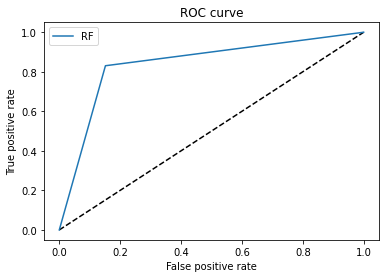

In [ ]:
# The random forest model by itself
from sklearn.metrics import roc_curve
y_pred_grd_rfcat = rf.predict_proba(X_train)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test.values.flatten()=="s", rf.predict(X_test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


ROC curve for RF classifier on label data, using best parameters found from random search. This curve the relationship of false positive and false negative results, essentially demonstrating model performance. Depending on what we care about the most (for example if we care the most about false positives), these figures can be very useful. In this case, the best parameters resulted in an ROC curve with best results around true positive: 0.81, false positive:0.18

***661: Check results with kaggle script***

In [ ]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  test.csv  training.csv
random_submission.zip                    test.zip  training.zip


In [ ]:
%load HiggsBosonCompetition_AMSMetric_rev1.py

In [ ]:
import os
import csv
import math

In [ ]:
best = rf.fit(X_train, y_Train.values)

In [ ]:
solution = pd.DataFrame()

In [ ]:
solution['EventID'] = 

In [ ]:
solution

""


In [ ]:
def create_solution_dictionary(solution):
    """ Read solution file, return a dictionary with key EventId and value (weight,label).
    Solution file headers: EventId, Label, Weight """
    
    solnDict = {}
    with open(solution, 'rb') as f:
        soln = csv.reader(f)
        soln.next() # header
        for row in soln:
            if row[0] not in solnDict:
                solnDict[row[0]] = (row[1], row[2])
    return solnDict


In [ ]:
def check_submission(submission, Nelements):
    """ Check that submission RankOrder column is correct:
        1. All numbers are in [1,NTestSet]
        2. All numbers are unqiue
    """
    rankOrderSet = set()    
    with open(submission, 'rb') as f:
        sub = csv.reader(f)
        sub.next() # header
        for row in sub:
            rankOrderSet.add(row[1])
            
    if len(rankOrderSet) != Nelements:
        print('RankOrder column must contain unique values')
        exit()
    elif rankOrderSet.isdisjoint(set(xrange(1,Nelements+1))) == False:
        print('RankOrder column must contain all numbers from [1..NTestSset]')
        exit()
    else:
        return True


In [ ]:
def AMS(s, b):
    """ Approximate Median Significance defined as:
        AMS = sqrt(
                2 { (s + b + b_r) log[1 + (s/(b+b_r))] - s}
              )        
    where b_r = 10, b = background, s = signal, log is natural logarithm """
    
    br = 10.0
    radicand = 2 *( (s+b+br) * math.log (1.0 + s/(b+br)) -s)
    if radicand < 0:
        print('radicand is negative. Exiting')
        exit()
    else:
        return math.sqrt(radicand)


In [ ]:
def AMS_metric(solution, submission):
    """  Prints the AMS metric value to screen.
    Solution File header: EventId, Class, Weight
    Submission File header: EventId, RankOrder, Class
    """
    
    numEvents = 550000 # number of events = size of test set
    
    # solutionDict: key=eventId, value=(label, class)
    solutionDict = create_solution_dictionary(solution)

    signal = 0.0
    background = 0.0
    if check_submission(submission, numEvents):
        with open(submission, 'rb') as f:
            sub = csv.reader(f)
            sub.next() # header row
            for row in sub:
                if row[2] == 's': # only events predicted to be signal are scored
                    if solutionDict[row[0]][0] == 's':
                        signal += float(solutionDict[row[0]][1])
                    elif solutionDict[row[0]][0] == 'b':
                        background += float(solutionDict[row[0]][1])
     
        print('signal = {0}, background = {1}'.format(signal, background))
        print('AMS = ' + str(AMS(signal, background)))


In [ ]:
if __name__ == "__main__":

    # enter path and file names here    
    path = ""
    solutionFile = ""
    submissionFile = ""
    
    AMS_metric(solutionFile, submissionFile)

FileNotFoundError: ignored

---

<h1 style="color:red"> Amazing !</h1>
